# Data loading:

In [1]:
# import our own data reader for txt 
import txtreader as tr

# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

import os

In [2]:
# Geting path for txt file. Using os.
cwd = os.getcwd()
path = cwd + '\\data\\aadr.us.txt'

In [3]:
# Loading data file with type txt, using txtreader (tr):
metadata, text = tr.read_txt(path)

In [4]:
# File metadata:
metadata

{'created': '2024-02-06 11:00:16',
 'modified': '2024-02-06 10:30:54',
 'size': 72474}

In [5]:
# File raw text/content:
text

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0
...,...,...,...,...,...,...,...
1561,2017-11-07,57.29,57.346,57.1446,57.285,50935,0
1562,2017-11-08,57.31,57.55,57.22,57.49,71770,0
1563,2017-11-09,57.23,57.23,56.71,56.9265,53130,0
1564,2017-11-10,56.96,56.96,56.3909,56.4,29233,0


In [6]:
# Make a DataFrame with the columns filetype, meta and text:
df = pd.DataFrame(columns = ['filetype','meta', 'text'])

In [7]:
# Verify the columns have been created:
df

,filetype,meta,text


In [8]:
# All the txt files:
in_txt = [path]

In [9]:
ingestable = []
for uri in in_txt:
    mymeta, text = tr.read_txt(uri)
    ingestable.append(text)
    
    # Adding an index to the dataframe:
    df.loc[len(df.index)] = ['txt', mymeta, text]
ingestable

[            Date    Open    High      Low    Close Volume OpenInt
 0     2010-07-21  24.333  24.333   23.946   23.946  43321       0
 1     2010-07-22  24.644  24.644   24.362   24.487  18031       0
 2     2010-07-23  24.759  24.759   24.314   24.507   8897       0
 3     2010-07-26  24.624  24.624   24.449   24.595  19443       0
 4     2010-07-27  24.477  24.517   24.431   24.517   8456       0
 ...          ...     ...     ...      ...      ...    ...     ...
 1561  2017-11-07   57.29  57.346  57.1446   57.285  50935       0
 1562  2017-11-08   57.31   57.55    57.22    57.49  71770       0
 1563  2017-11-09   57.23   57.23    56.71  56.9265  53130       0
 1564  2017-11-10   56.96   56.96  56.3909     56.4  29233       0
 1565                None    None     None     None   None    None
 
 [1566 rows x 7 columns]]

In [10]:
df 

,filetype,meta,text
0,txt,"{'created': '2024-02-06 11:00:16', 'modified':...",Date Open High Low C...


In [11]:
df['text'][0].head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [12]:
df['text'][0].shape

(1566, 7)

In [13]:
df['text'][0].columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

# Exploring and Cleaning Data

In [14]:
# Count the missing values in DataFrame
df['text'][0].isnull().sum()

Date       0
Open       1
High       1
Low        1
Close      1
Volume     1
OpenInt    1
dtype: int64

In [15]:
# Hole row with None 
df['text'][0].iloc[1565]

Date           
Open       None
High       None
Low        None
Close      None
Volume     None
OpenInt    None
Name: 1565, dtype: object

In [16]:
# Droping OpenInt due to being all zero's:
df['text'][0] = df['text'][0].drop(['OpenInt'], axis=1)

# Droping hole row at index 1565 due to being all None:
df['text'][0] = df['text'][0].drop(1565)

In [17]:
# Now empty/relevant data have been clean/remove:
df['text'][0]

,Date,Open,High,Low,Close,Volume
0,2010-07-21,24.333,24.333,23.946,23.946,43321
1,2010-07-22,24.644,24.644,24.362,24.487,18031
2,2010-07-23,24.759,24.759,24.314,24.507,8897
3,2010-07-26,24.624,24.624,24.449,24.595,19443
4,2010-07-27,24.477,24.517,24.431,24.517,8456
...,...,...,...,...,...,...
1560,2017-11-06,57.61,57.7372,57.2285,57.65,41601
1561,2017-11-07,57.29,57.346,57.1446,57.285,50935
1562,2017-11-08,57.31,57.55,57.22,57.49,71770
1563,2017-11-09,57.23,57.23,56.71,56.9265,53130


In [18]:
# Convert columns to numeric if they are not already:
df['text'][0]['Open'] = pd.to_numeric(df['text'][0]['Open'])
df['text'][0]['Close'] = pd.to_numeric(df['text'][0]['Close'])
df['text'][0]['High'] = pd.to_numeric(df['text'][0]['High'])
df['text'][0]['Low'] = pd.to_numeric(df['text'][0]['Low'])
df['text'][0]['Volume'] = pd.to_numeric(df['text'][0]['Volume'])

In [19]:
# Adding an additional column:
# The procent change (daily) from when the marked open to close:
tmp = df['text'][0]

df['text'][0]['Change%'] =  ((tmp['Open'] - tmp['Close']) / tmp['Close'] * 100)

In [20]:
df['text'][0]

,Date,Open,High,Low,Close,Volume,Change%
0,2010-07-21,24.333,24.3330,23.9460,23.9460,43321,1.616136
1,2010-07-22,24.644,24.6440,24.3620,24.4870,18031,0.641157
2,2010-07-23,24.759,24.7590,24.3140,24.5070,8897,1.028278
3,2010-07-26,24.624,24.6240,24.4490,24.5950,19443,0.117910
4,2010-07-27,24.477,24.5170,24.4310,24.5170,8456,-0.163152
...,...,...,...,...,...,...,...
1560,2017-11-06,57.610,57.7372,57.2285,57.6500,41601,-0.069384
1561,2017-11-07,57.290,57.3460,57.1446,57.2850,50935,0.008728
1562,2017-11-08,57.310,57.5500,57.2200,57.4900,71770,-0.313098
1563,2017-11-09,57.230,57.2300,56.7100,56.9265,53130,0.533144


In [21]:
# Types of attributes
df['text'][0].dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
Change%    float64
dtype: object

In [22]:
# Insights of the value scope
df['text'][0].describe()

,Open,High,Low,Close,Volume,Change%
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,36.014550,36.137120,35.855319,35.987517,6452.979553,0.067456
std,6.957747,7.002548,6.878264,6.933814,12047.101114,0.792420
min,23.936000,23.946000,23.867000,23.946000,2.000000,-4.593798
25%,29.829000,29.966000,29.819000,29.862000,529.000000,-0.242411
50%,36.512000,36.571000,36.322000,36.464000,1559.000000,0.000000
75%,38.957000,39.123000,38.787000,38.838000,5993.000000,0.318077
max,58.620000,58.720000,57.700000,58.430000,106139.000000,7.224161


In [23]:
# Mean of change% and volume
change_procent = np.mean(df['text'][0]['Change%'])
avg = np.mean(df['text'][0]['Volume'])

print(f'change_procent: {change_procent}')
print(f'avg: {avg}')

change_procent: 0.06745563554523598
avg: 6452.979552715655


# Visualisation

In [24]:
# Other utilities
from sklearn import datasets, preprocessing, metrics

import matplotlib.pyplot as plt

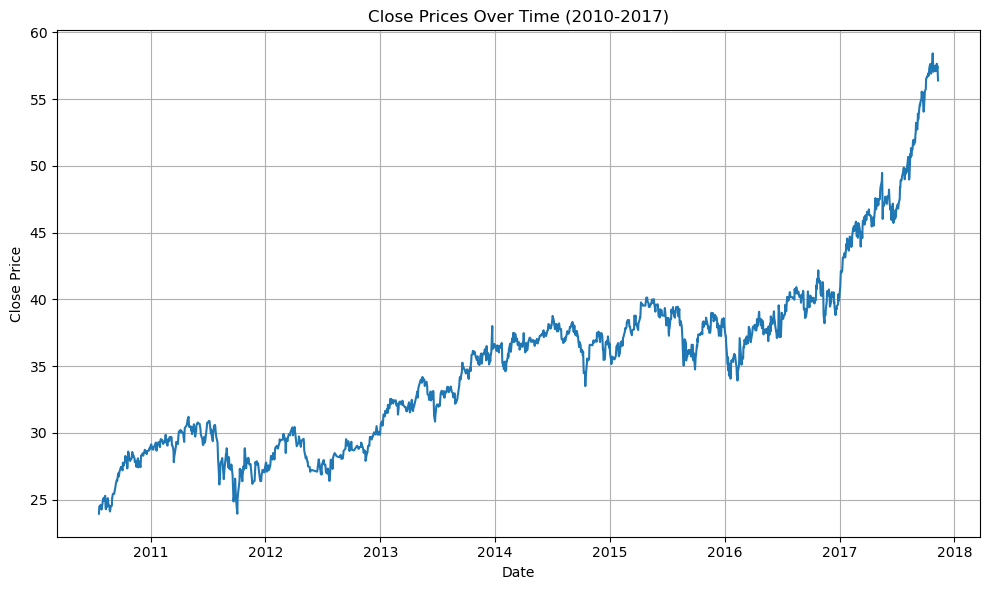

In [25]:
tmp1 = df['text'][0]

plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(tmp1['Date']), tmp1['Close'])
plt.title('Close Prices Over Time (2010-2017)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()